In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv("eda.csv") #reading data frame

testzgigig

In [3]:
dfcopy2=df.copy() #make a copy of database so with mistake i dont change it

In [5]:
dfcopy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   id             21597 non-null  int64  
 4   id.1           21597 non-null  int64  
 5   bedrooms       21597 non-null  float64
 6   bathrooms      21597 non-null  float64
 7   sqft_living    21597 non-null  float64
 8   sqft_lot       21597 non-null  float64
 9   floors         21597 non-null  float64
 10  waterfront     19206 non-null  float64
 11  view           21534 non-null  float64
 12  condition      21597 non-null  int64  
 13  grade          21597 non-null  int64  
 14  sqft_above     21597 non-null  float64
 15  sqft_basement  21145 non-null  float64
 16  yr_built       21597 non-null  int64  
 17  yr_renovated   17749 non-null  float64
 18  zipcod

In [6]:
df.head(5)

date     price    house_id  id        id.1  bedrooms  bathrooms  \
0  2014-10-13  221900.0  7129300520   1  7129300520       3.0       1.00   
1  2014-12-09  538000.0  6414100192   2  6414100192       3.0       2.25   
2  2015-02-25  180000.0  5631500400   3  5631500400       2.0       1.00   
3  2014-12-09  604000.0  2487200875   4  2487200875       4.0       3.00   
4  2015-02-18  510000.0  1954400510   5  1954400510       3.0       2.00   

   sqft_living  sqft_lot  floors  ...  grade  sqft_above  sqft_basement  \
0       1180.0    5650.0     1.0  ...      7      1180.0            0.0   
1       2570.0    7242.0     2.0  ...      7      2170.0          400.0   
2        770.0   10000.0     1.0  ...      6       770.0            0.0   
3       1960.0    5000.0     1.0  ...      7      1050.0          910.0   
4       1680.0    8080.0     1.0  ...      8      1680.0            0.0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955           0.0    98178  47.5112 -122.257         1340.0   
1      1951       19910.0    98125  47.7210 -122.319         1690.0   
2      1933           NaN    98028  47.7379 -122.233         2720.0   
3      1965           0.0    98136  47.5208 -122.393         1360.0   
4      1987           0.0    98074  47.6168 -122.045         1800.0   

   sqft_lot15  
0      5650.0  
1      7639.0  
2      8062.0  
3      5000.0  
4      7503.0  

[5 rows x 23 columns]

In [ ]:
# ichoose Thomas Hansen	Buyer	5 kids, no money, wants nice (social) neighborhood, Timing?, Location? so i have timing variable
# i have to [somehow combine yr_built and yr_renovated (timing)], [(zipcode,lat,long)as location] and [price as 

In [ ]:
#Step 1: Understand Thomas's Requirements
#5 kids: He needs a spacious house with enough bedrooms and bathrooms.
#No money: The houses should be affordable (focus on lower price range).
#Timing?: Consider the date of sale for recent availability.
#Location?: Consider specific locations 

#Step 2: Data Cleaning and Preparation
#Ensure all columns have appropriate data types.
#Handle missing values in crucial columns like price, bedrooms, bathrooms, sqft_living, condition, etc.

#Step 3: Filtering and Feature Engineering
#Bedrooms and Bathrooms: Filter houses with at least 4 bedrooms and 2 bathrooms to accommodate his large family.
#Price: Sort houses by price to focus on the lower end of the market.
#Neighborhood: Use zipcode, condition, and grade as proxies for neighborhood quality.
#Square Footage: Ensure sufficient living space (sqft_living and sqft_lot).

#Step 4: Exploratory Data Analysis (EDA)
#Distribution of Prices: Understand the distribution and identify affordable houses.
#Neighborhood Analysis: Analyze the average condition and grade in different zipcode areas to find social neighborhoods.
#Size and Space: Analyze sqft_living and sqft_lot to ensure the houses are spacious.

#Step 5: Visualization and Final Selection
#Use visualizations to compare houses in terms of price, size, condition, and neighborhood quality.
#Select the top 3 houses that best match Thomas’s criteria.

In [7]:
dfcopy2.drop("id",axis=1,inplace=True)

In [8]:
dfcopy2.drop("id.1",axis=1,inplace=True)

In [9]:
dfcopy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   bedrooms       21597 non-null  float64
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  float64
 6   sqft_lot       21597 non-null  float64
 7   floors         21597 non-null  float64
 8   waterfront     19206 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  float64
 13  sqft_basement  21145 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17749 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [10]:
dfcopy2["date"]=pd.to_datetime(dfcopy2["date"])

In [11]:
dfcopy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   house_id       21597 non-null  int64         
 3   bedrooms       21597 non-null  float64       
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  float64       
 6   sqft_lot       21597 non-null  float64       
 7   floors         21597 non-null  float64       
 8   waterfront     19206 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  float64       
 13  sqft_basement  21145 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1774

In [12]:
dfcopy2.isna().sum()

date                0
price               0
house_id            0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [13]:
dfcopy2["waterfront"].head()

0    NaN
1    0.0
2    0.0
3    0.0
4    0.0
Name: waterfront, dtype: float64

In [14]:
#i wont drop any other information so i just fill nan values for
modeWater = dfcopy2["waterfront"].mode()[0]  
modeview = dfcopy2["view"].mode()[0]
meansqft_basement=dfcopy2["sqft_basement"].mean()
modeyr_renovated=dfcopy2["yr_renovated"].mode()[0]

# Fill NaN values with the mode value except for sqft_basement
dfcopy2["waterfront"].fillna(modeWater, inplace=True)
dfcopy2["view"].fillna(modeview, inplace=True)
dfcopy2["sqft_basement"].fillna(meansqft_basement, inplace=True)
dfcopy2["yr_renovated"].fillna(modeyr_renovated, inplace=True)

C:\Users\masud\AppData\Local\Temp\ipykernel_5284\4243905389.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfcopy2["waterfront"].fillna(modeWater, inplace=True)
C:\Users\masud\AppData\Local\Temp\ipykernel_5284\4243905389.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [15]:
dfcopy2.isna().sum()

date             0
price            0
house_id         0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
#Now i have filled all nan values with mean and mode

In [16]:
dfcopy2.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [17]:
dfcopy2.date.head(6) #just checking date column

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
5   2014-05-12
Name: date, dtype: datetime64[ns]

In [18]:
dfcopy2.head()

date     price    house_id  bedrooms  bathrooms  sqft_living  \
0 2014-10-13  221900.0  7129300520       3.0       1.00       1180.0   
1 2014-12-09  538000.0  6414100192       3.0       2.25       2570.0   
2 2015-02-25  180000.0  5631500400       2.0       1.00        770.0   
3 2014-12-09  604000.0  2487200875       4.0       3.00       1960.0   
4 2015-02-18  510000.0  1954400510       3.0       2.00       1680.0   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0    5650.0     1.0         0.0   0.0  ...      7      1180.0            0.0   
1    7242.0     2.0         0.0   0.0  ...      7      2170.0          400.0   
2   10000.0     1.0         0.0   0.0  ...      6       770.0            0.0   
3    5000.0     1.0         0.0   0.0  ...      7      1050.0          910.0   
4    8080.0     1.0         0.0   0.0  ...      8      1680.0            0.0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955           0.0    98178  47.5112 -122.257         1340.0   
1      1951       19910.0    98125  47.7210 -122.319         1690.0   
2      1933           0.0    98028  47.7379 -122.233         2720.0   
3      1965           0.0    98136  47.5208 -122.393         1360.0   
4      1987           0.0    98074  47.6168 -122.045         1800.0   

   sqft_lot15  
0      5650.0  
1      7639.0  
2      8062.0  
3      5000.0  
4      7503.0  

[5 rows x 21 columns]

In [20]:
# Filter based on requirements
filtered_dfcopy2 = dfcopy2[
    (dfcopy2['bedrooms'] >= 4) & 
    (dfcopy2['bathrooms'] >= 2) &
    (dfcopy2['price'] <= dfcopy2['price'].quantile(0.3))  # focus on the lower 30% price range
]

In [21]:
filtered_dfcopy2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1051 entries, 22 to 21549
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1051 non-null   datetime64[ns]
 1   price          1051 non-null   float64       
 2   house_id       1051 non-null   int64         
 3   bedrooms       1051 non-null   float64       
 4   bathrooms      1051 non-null   float64       
 5   sqft_living    1051 non-null   float64       
 6   sqft_lot       1051 non-null   float64       
 7   floors         1051 non-null   float64       
 8   waterfront     1051 non-null   float64       
 9   view           1051 non-null   float64       
 10  condition      1051 non-null   int64         
 11  grade          1051 non-null   int64         
 12  sqft_above     1051 non-null   float64       
 13  sqft_basement  1051 non-null   float64       
 14  yr_built       1051 non-null   int64         
 15  yr_renovated   1051 non-

In [22]:
dfcopy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   house_id       21597 non-null  int64         
 3   bedrooms       21597 non-null  float64       
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  float64       
 6   sqft_lot       21597 non-null  float64       
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  float64       
 9   view           21597 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  float64       
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

In [25]:
#with this filtering we get from 20000 rows to only 1000 rows
filtered_dfcopy2["condition"].head(5)

22    3
34    3
51    4
56    3
67    3
Name: condition, dtype: int64

In [27]:
filtered_dfcopy2["grade"].head(5)

22    8
34    7
51    8
56    7
67    7
Name: grade, dtype: int64

In [30]:
# Analyze Neighborhood Quality. here we groupby zip code to say for example for each zipcode what is the mean value for condition
# Group by 'zipcode' and calculate the mean of 'condition'
condition_mean = filtered_dfcopy2.groupby('zipcode')['condition'].mean()

# Group by 'zipcode' and calculate the mean of 'grade'
grade_mean = filtered_dfcopy2.groupby('zipcode')['grade'].mean()

# Group by 'zipcode' and calculate the median of 'pricePrice'
price_median = filtered_dfcopy2.groupby('zipcode')['price'].mean()

# Combine the results into a single DataFrame
neighborhood_quality = pd.DataFrame({
    'condition': condition_mean,
    'grade': grade_mean,
    'price': price_median
}).reset_index()

In [31]:
neighborhood_quality.head()

zipcode  condition     grade          price
0    98001   3.173333  7.280000  271486.946667
1    98002   3.533333  7.111111  278894.111111
2    98003   3.200000  7.650000  287786.000000
3    98007   3.000000  8.000000  295000.000000
4    98010   3.333333  7.000000  300116.666667

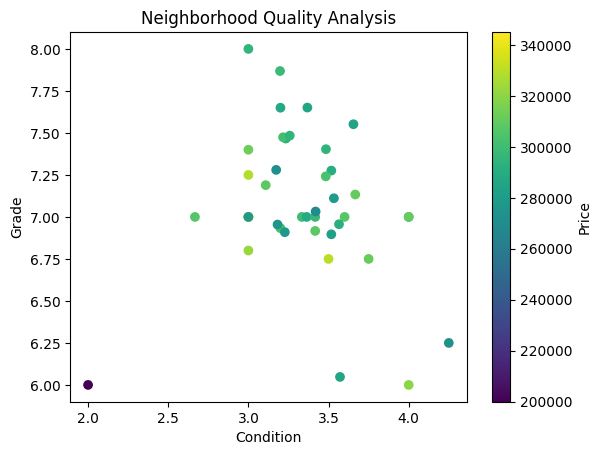

In [37]:
# Visualize Neighborhood Quality

plt.scatter(neighborhood_quality['condition'], neighborhood_quality['grade'], c=neighborhood_quality['price'])
plt.colorbar(label="Price")
plt.xlabel('Condition')
plt.ylabel('Grade')
plt.title('Neighborhood Quality Analysis')
plt.show()


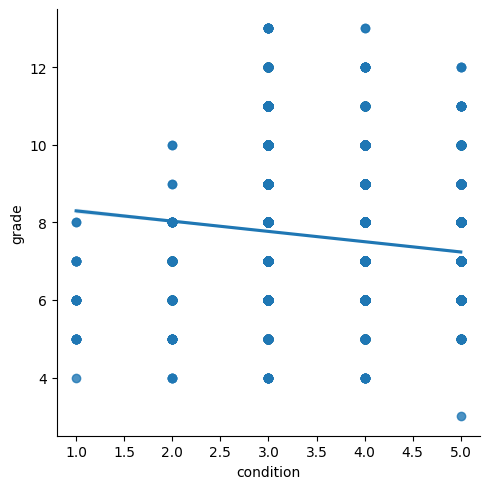

In [48]:
sns.lmplot(data=dfcopy2,x='condition',y='grade')

In [38]:
#based on this fig we can say that Gerade has the reverse realationship with condition.lets look at relationship between price and condition.
#this plot is for location question with low price we have two data points which is quite good based on quality with reseanoble price (3.5,6,250000)
# Select top neighborhoods with good condition and grade and low price.but here we dont filter price since we already selected the price lowe than 30%
top_neighborhoods = neighborhood_quality[(neighborhood_quality['condition'] >= 3) & (neighborhood_quality['grade'] >= 6.5)]
top_zipcodes = top_neighborhoods['zipcode'].values

In [39]:
print(top_zipcodes) #below are zipcodes that mathes our creiteria meaning at least 3 bedroom and 2 bath in good location and low price

[98001 98002 98003 98007 98010 98011 98019 98022 98023 98024 98027 98030
 98031 98032 98034 98038 98042 98045 98055 98058 98059 98072 98092 98106
 98108 98116 98118 98122 98133 98144 98146 98148 98155 98168 98178 98188
 98198]


In [45]:
# Filter houses in top neighborhoods
final_selection = filtered_dfcopy2[filtered_dfcopy2['zipcode'].isin(top_zipcodes)].sort_values(by='price').head(3)

print(final_selection[['price', 'bedrooms', 'bathrooms', 'sqft_living15', 'zipcode',"date"]])

          price  bedrooms  bathrooms  sqft_living15  zipcode       date
15796  133000.0       5.0       2.00         1860.0    98118 2014-12-20
13215  150000.0       4.0       2.00         1460.0    98178 2014-10-31
11745  160000.0       4.0       2.25         2400.0    98055 2015-02-11


In [43]:
filtered_dfcopy2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1051 entries, 22 to 21549
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1051 non-null   datetime64[ns]
 1   price          1051 non-null   float64       
 2   house_id       1051 non-null   int64         
 3   bedrooms       1051 non-null   float64       
 4   bathrooms      1051 non-null   float64       
 5   sqft_living    1051 non-null   float64       
 6   sqft_lot       1051 non-null   float64       
 7   floors         1051 non-null   float64       
 8   waterfront     1051 non-null   float64       
 9   view           1051 non-null   float64       
 10  condition      1051 non-null   int64         
 11  grade          1051 non-null   int64         
 12  sqft_above     1051 non-null   float64       
 13  sqft_basement  1051 non-null   float64       
 14  yr_built       1051 non-null   int64         
 15  yr_renovated   1051 non-

In [ ]:
#!pip install geojson


In [53]:
pip install plotly


[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached plotly-5.23.0-py3-none-any.whl (17.3 MB)
  Using cached tenacity-9.0.0-py3-none-any.whl (28 kB)


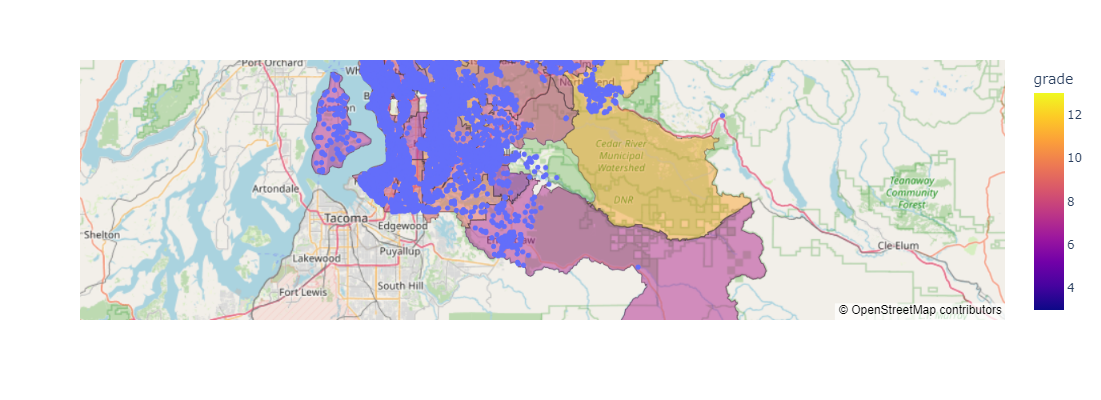

In [55]:
import plotly.express as px
avg_latitude = dfcopy2['lat'].mean()
avg_longitude = dfcopy2['long'].mean()
import geojson
url_geojson = "https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json"
fig = px.choropleth_mapbox(dfcopy2, 
                           geojson=url_geojson, 
                           locations='zipcode', featureidkey='properties.ZCTA5CE10',
                           color='grade',
                           mapbox_style="open-street-map",
                           zoom=8, center={"lat": avg_latitude, "lon": avg_longitude},
                           opacity=0.5,
                           height=400,
                           width=600, 
                          )
# instead of dfcopy2 you can use ur filtered dataframe and highlight or color acc to your features of interest
fig2 = px.scatter_mapbox(dfcopy2, lat="lat", lon="long", zoom=3, height=400, width= 600, hover_data='price',mapbox_style='open-street-map')
for trace in fig2.data:
    fig.add_trace(trace)
fig.show()

In [56]:
dfcopy2["year"]=dfcopy2["year"].dt.year

In [57]:
dfcopy2.year.head(5)

0    2014
1    2014
2    2015
3    2014
4    2015
Name: year, dtype: int32

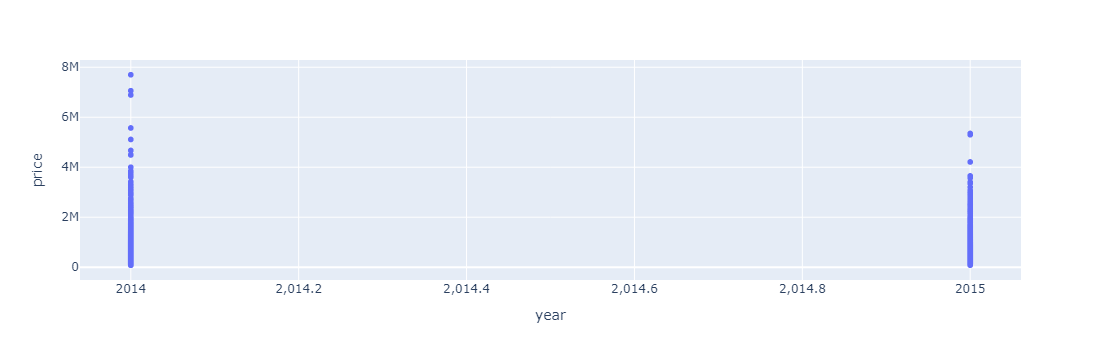

In [62]:
px.scatter(dfcopy2,x="year",y="price")

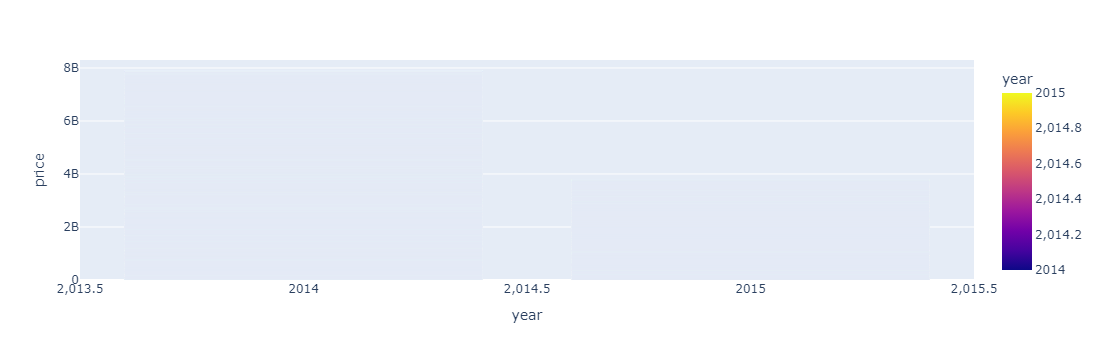

In [72]:
px.bar(dfcopy2,x="year",y="price",color='year',color_discrete_map={
        2014: 'red',
        2015: 'green'
    })

In [77]:
dfcopy2[dfcopy2.year==2015].price.max()

np.float64(5350000.0)

In [79]:
dfcopy2.groupby('year')['price'].count()

year
2014    14622
2015     6975
Name: price, dtype: int64

In [ ]:
#as you can see from bar plot the price 2

In [81]:
dfcopy2["month"]=dfcopy2["date"].dt.month

<Axes: xlabel='month'>

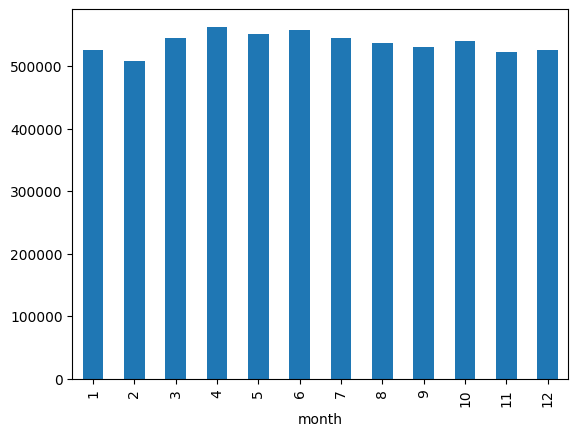

In [87]:
dfcopy2.groupby('month')['price'].mean().plot.bar()

In [98]:
gp = dfcopy2.groupby(["yr_built","sqft_living"])['price'].mean().reset_index()
gp

yr_built  sqft_living      price
0          1900        600.0   130000.0
1          1900        620.0   382888.0
2          1900        760.0   415000.0
3          1900        910.0   384950.0
4          1900        920.0   285000.0
...         ...          ...        ...
14052      2015       4000.0   786975.0
14053      2015       4010.0  1150000.0
14054      2015       4360.0  1290000.0
14055      2015       4460.0   490000.0
14056      2015       5640.0  2000000.0

[14057 rows x 3 columns]

<Axes: xlabel='yr_built', ylabel='sqft_living'>

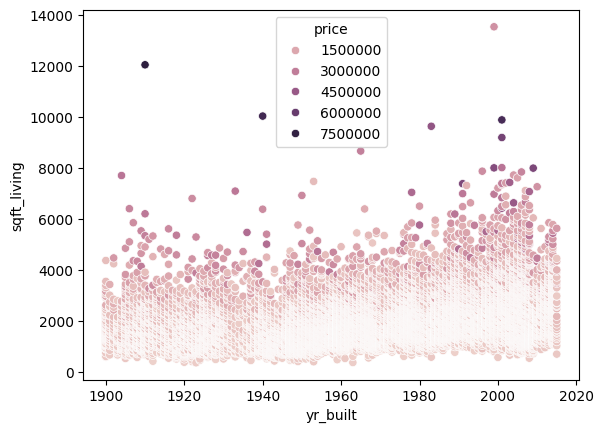

In [99]:
sns.scatterplot(data=gp,x='yr_built',y='sqft_living',hue='price')

In [100]:
#both year of built and sqft_living

<Axes: >

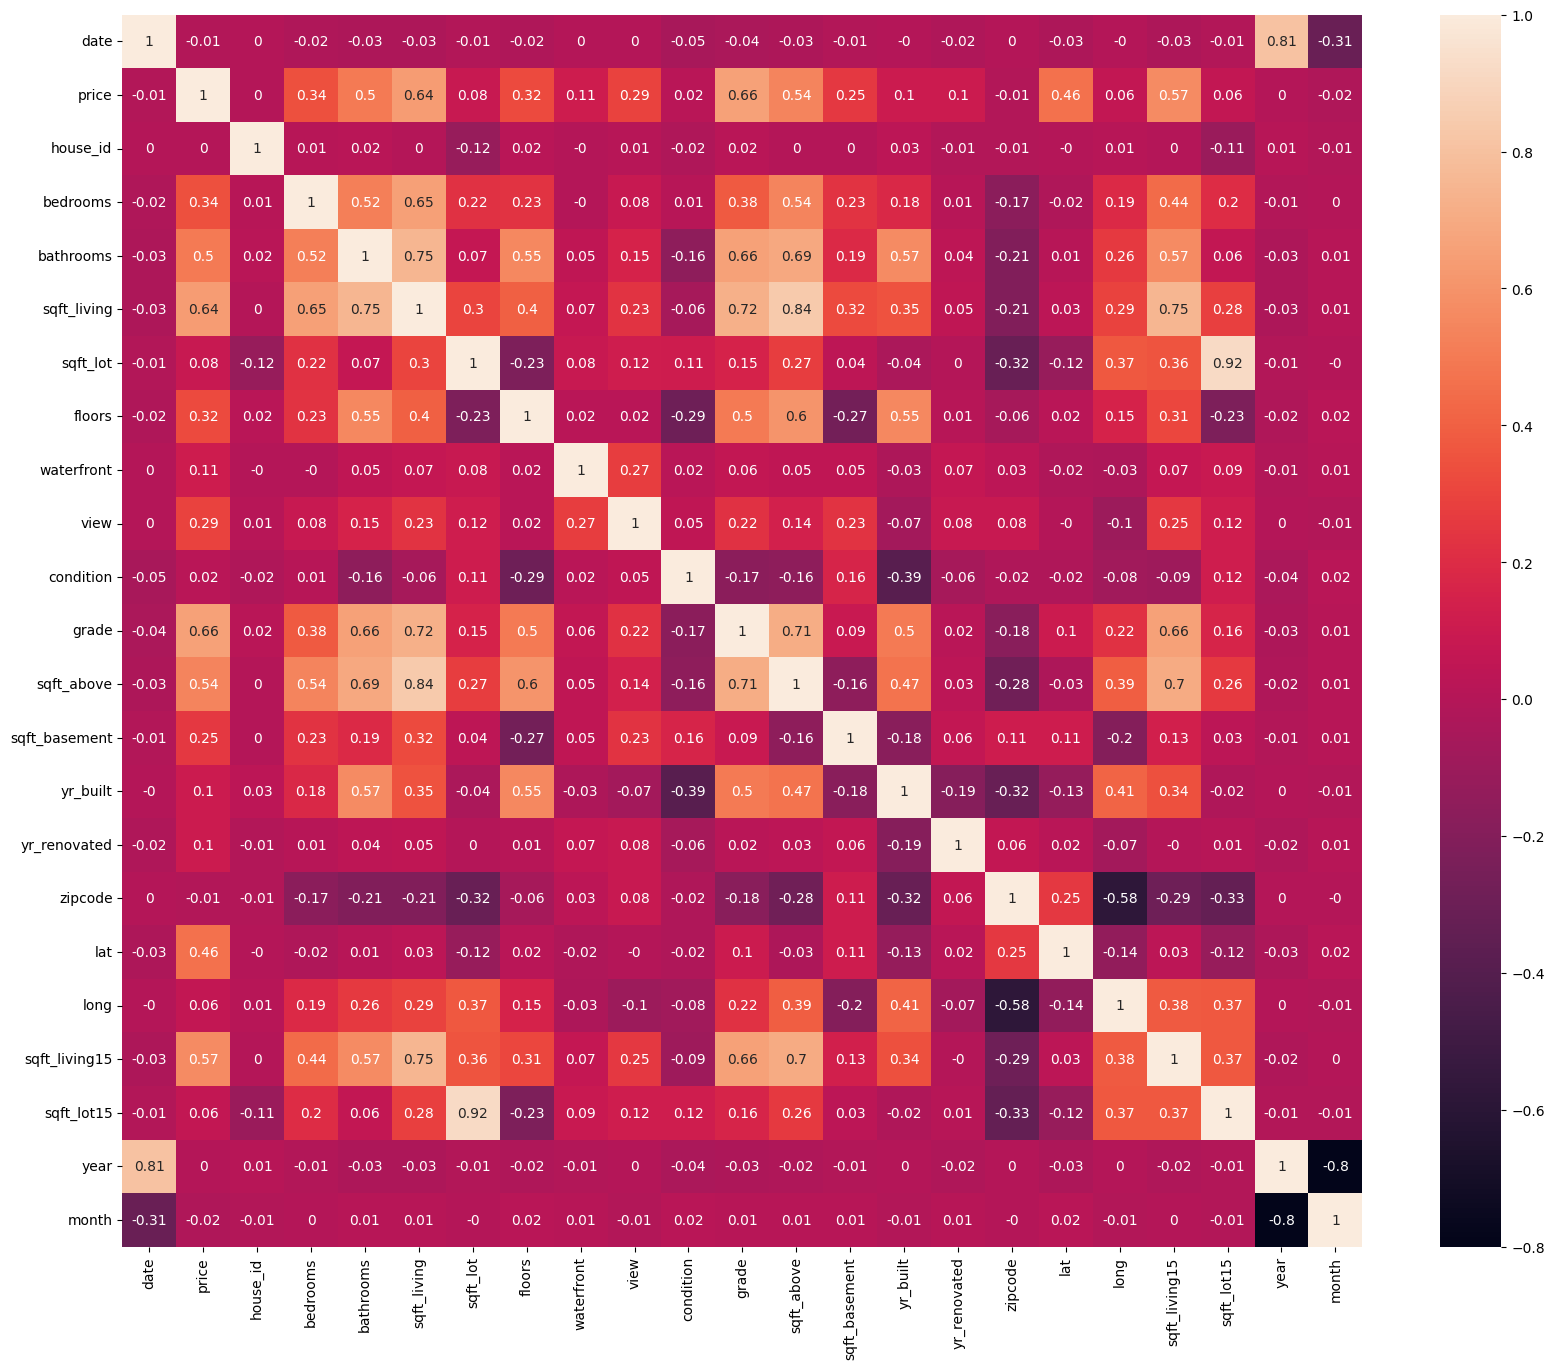

In [107]:
plt.figure(figsize=(20, 16))
sns.heatmap(dfcopy2.corr(method='spearman').round(2),annot=True)# in this method grade has the most effect


[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached scipy-1.14.0-cp311-cp311-win_amd64.whl (44.7 MB)


<Axes: >

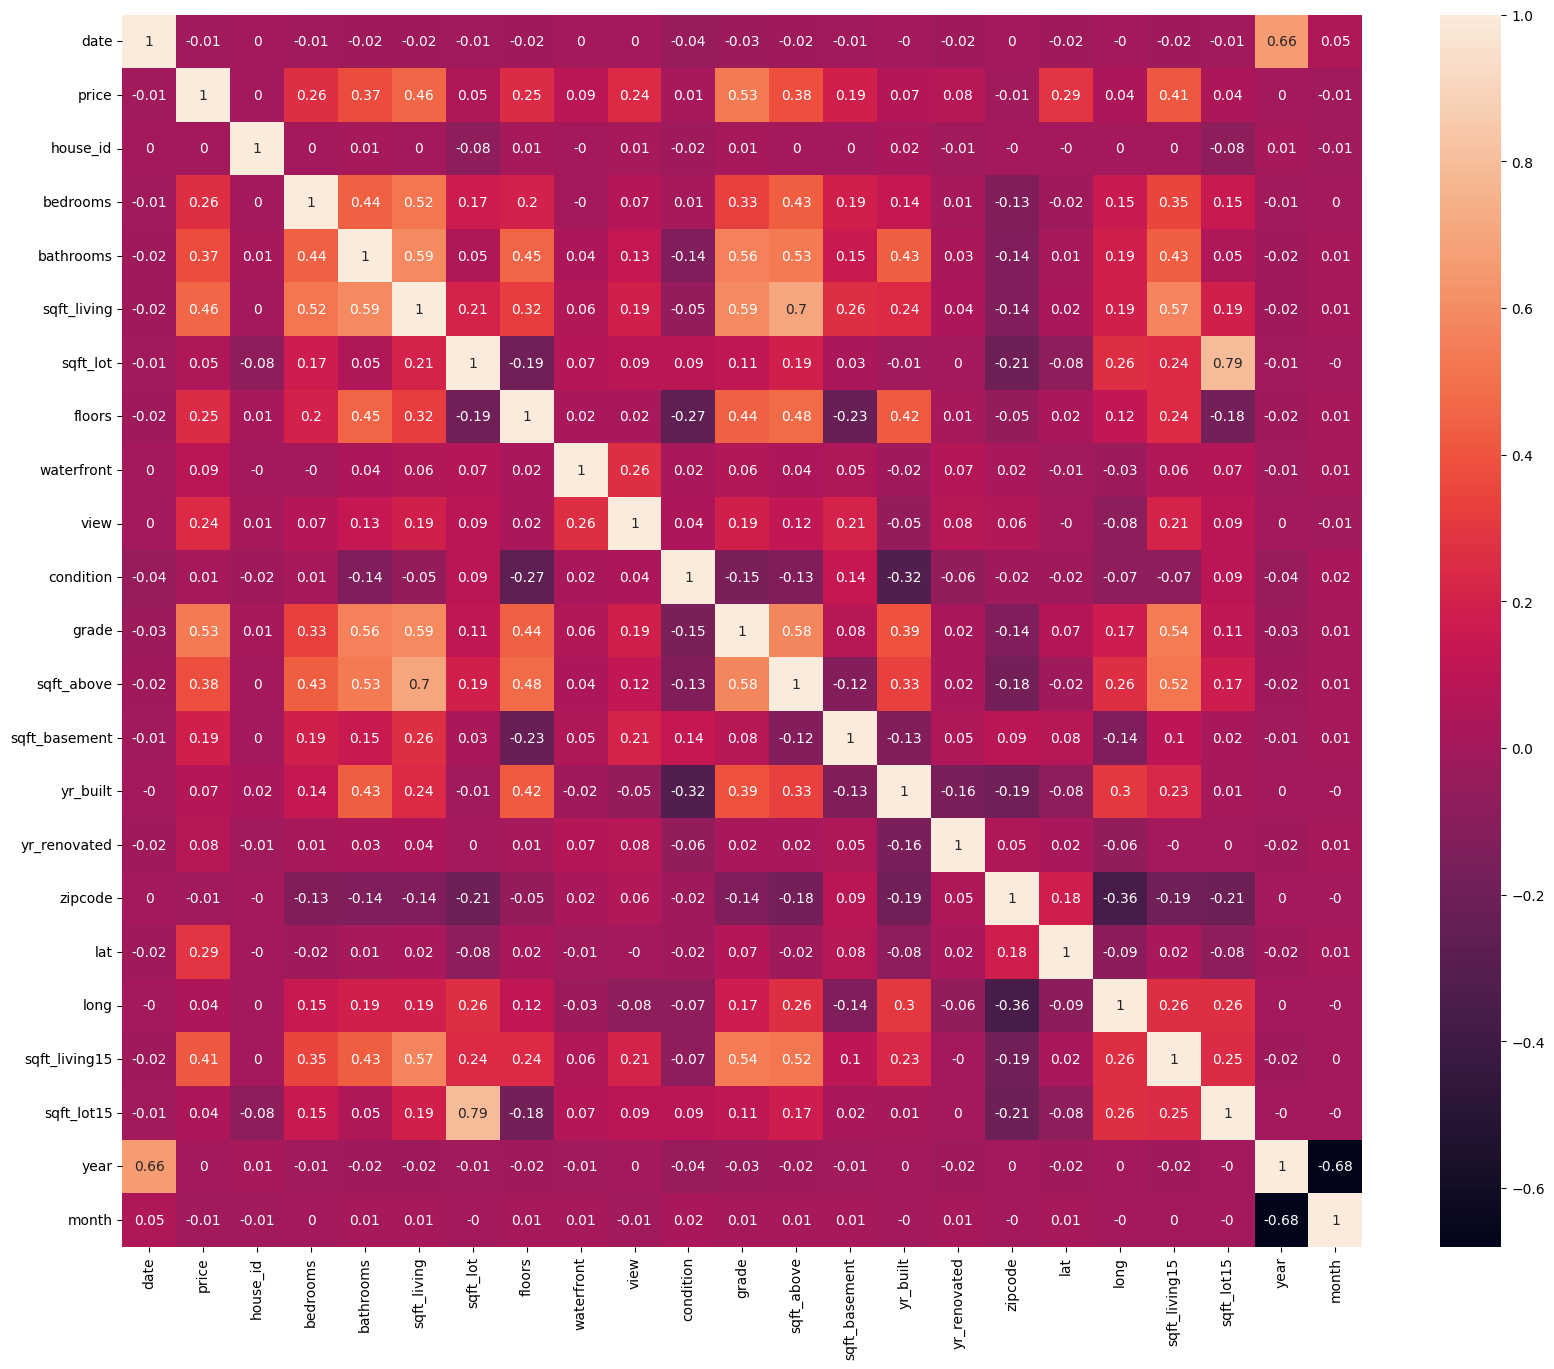

In [109]:
!pip install scipy
plt.figure(figsize=(20, 16))
sns.heatmap(dfcopy2.corr(method='kendall').round(2),annot=True)#in this method again grade has the most effect

<Axes: >

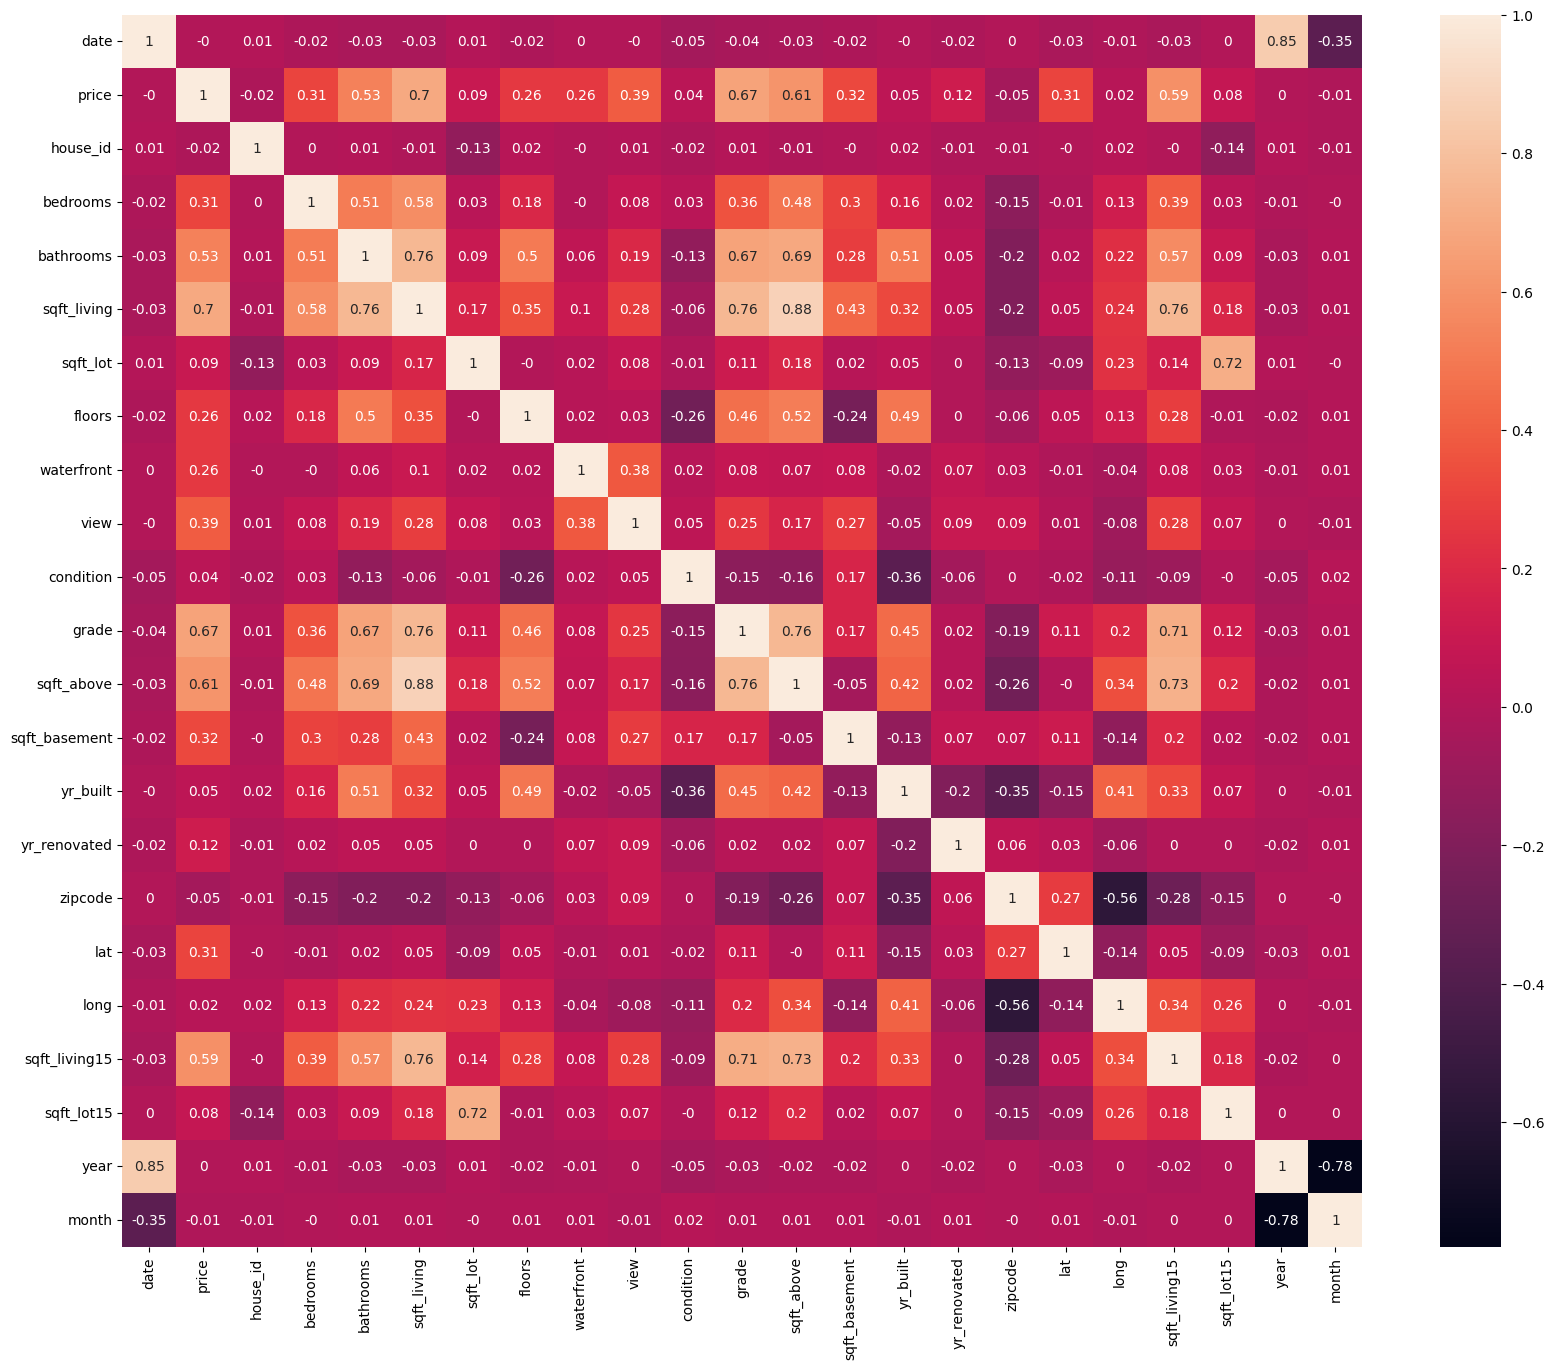

In [110]:
plt.figure(figsize=(20, 16))
sns.heatmap(dfcopy2.corr(method='pearson').round(2),annot=True)#in this mehod area is the most important thing.

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   id             21597 non-null  int64  
 4   id.1           21597 non-null  int64  
 5   bedrooms       21597 non-null  float64
 6   bathrooms      21597 non-null  float64
 7   sqft_living    21597 non-null  float64
 8   sqft_lot       21597 non-null  float64
 9   floors         21597 non-null  float64
 10  waterfront     19206 non-null  float64
 11  view           21534 non-null  float64
 12  condition      21597 non-null  int64  
 13  grade          21597 non-null  int64  
 14  sqft_above     21597 non-null  float64
 15  sqft_basement  21145 non-null  float64
 16  yr_built       21597 non-null  int64  
 17  yr_renovated   17749 non-null  float64
 18  zipcod